In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv(os.path.join('checkpoints', 'horse2zebra', 'loss_log.csv'))
df

epoch    loss_G  loss_G_A  loss_G_B  loss_cycle_A  loss_cycle_B  \
0      55  4.130044  0.580780  0.459109      1.091179      1.103942   
1      55  4.108405  0.582783  0.456833      1.081926      1.096805   
2      56  4.107087  0.580371  0.455886      1.083319      1.094386   
3      57  4.069453  0.583805  0.448850      1.069730      1.087193   
4      58  4.173340  0.605796  0.475721      1.082365      1.116282   
5      59  4.135469  0.615313  0.463412      1.073075      1.102042   
6      60  4.073737  0.616260  0.456299      1.055365      1.077301   
7      61  4.069953  0.597140  0.460326      1.052638      1.089523   
8      62  4.105946  0.609166  0.467160      1.061352      1.095189   
9      63  3.999529  0.595377  0.448798      1.035279      1.063527   
10     64  3.980118  0.601198  0.465527      1.023812      1.048754   
11     65  3.997438  0.587335  0.458813      1.035882      1.065859   
12     66  4.022468  0.609825  0.463818      1.044825      1.059763   
13     67  4.026508  0.610377  0.471779      1.031618      1.063391   
14     68  4.009709  0.610888  0.466638      1.025361      1.062453   
15     69  3.983662  0.617551  0.460564      1.021420      1.045783   
16     70  3.921211  0.593813  0.463867      0.996983      1.045556   
17     71  3.921113  0.595557  0.460733      1.003451      1.039965   
18     72  3.948501  0.614413  0.468342      0.984411      1.058506   
19     73  3.885404  0.594926  0.459912      0.996303      1.025112   
20     74  3.906750  0.601915  0.467307      0.993323      1.031427   
21     75  3.891516  0.614165  0.467732      0.976562      1.028098   
22     76  3.857878  0.598959  0.465659      0.974149      1.019241   
23     77  3.894729  0.614315  0.470631      0.975311      1.026835   
24     78  3.942105  0.611506  0.483378      0.981283      1.048585   
25     79  3.899495  0.613957  0.480545      0.980684      1.023646   
26     80  3.907588  0.624145  0.471602      0.975071      1.034136   
27     81  3.866146  0.627555  0.473402      0.970783      1.007339   
28     82  3.852446  0.615197  0.483231      0.965309      1.009157   
29     83  3.907232  0.621276  0.484726      0.974572      1.031410   
30     84  3.837677  0.600924  0.480989      0.959004      1.007166   
31     85  3.871299  0.634108  0.482579      0.967960      1.005608   
32     86  3.809273  0.616480  0.479902      0.947836      0.996266   
33     87  3.824003  0.619533  0.492669      0.937280      1.004062   
34     88  3.790482  0.612440  0.479622      0.938277      0.991307   
35     89  3.799438  0.612350  0.487310      0.932799      0.994518   
36     90  3.819856  0.624537  0.481727      0.934202      1.005400   
37     91  3.815995  0.625613  0.485199      0.953163      0.986297   
38     92  3.805245  0.627762  0.486896      0.925399      0.997556   
39     93  3.767546  0.614734  0.480477      0.929763      0.987857   
40     94  3.764764  0.627774  0.478112      0.921450      0.983581   
41     95  3.746287  0.625690  0.490192      0.908646      0.978106   
42     96  3.774930  0.612410  0.496254      0.917870      0.994083   
43     97  3.745722  0.616774  0.491731      0.908019      0.983292   
44     98  3.740980  0.608547  0.483237      0.919975      0.979438   
45     99  3.744087  0.635118  0.487843      0.902677      0.975741   
46    100  3.716730  0.629206  0.474432      0.905436      0.970487   

    loss_idt_A  loss_idt_B  loss_D_A  loss_D_B  
0     0.448380    0.446654  0.124027  0.170762  
1     0.445368    0.444690  0.122336  0.171962  
2     0.446555    0.446570  0.122485  0.171102  
3     0.440102    0.439773  0.120459  0.173367  
4     0.449927    0.443249  0.113517  0.165211  
5     0.444347    0.437280  0.111420  0.168653  
6     0.437480    0.431031  0.117746  0.167560  
7     0.438323    0.432003  0.120011  0.168202  
8     0.442939    0.430140  0.114869  0.167527  
9     0.434216    0.422332  0.119973  0.173193  
10    0.421282    0.419544  0.118047  0.170237  
11    0

In [9]:
df['total_loss'] = df['loss_G_A'] + df['loss_G_B'] + 10 * (df['loss_cycle_A'] + df['loss_cycle_B'])

<Axes: xlabel='epoch'>

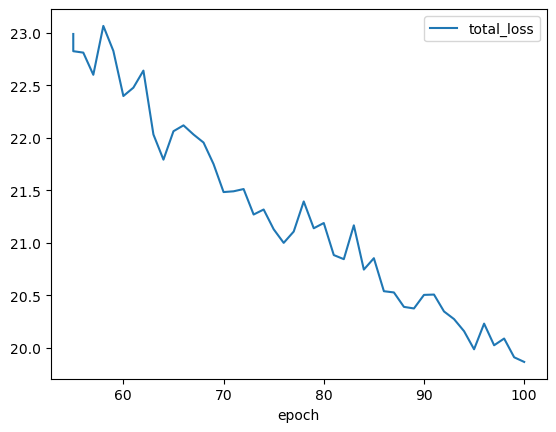

In [11]:
df.plot(kind='line', x='epoch', y='total_loss')

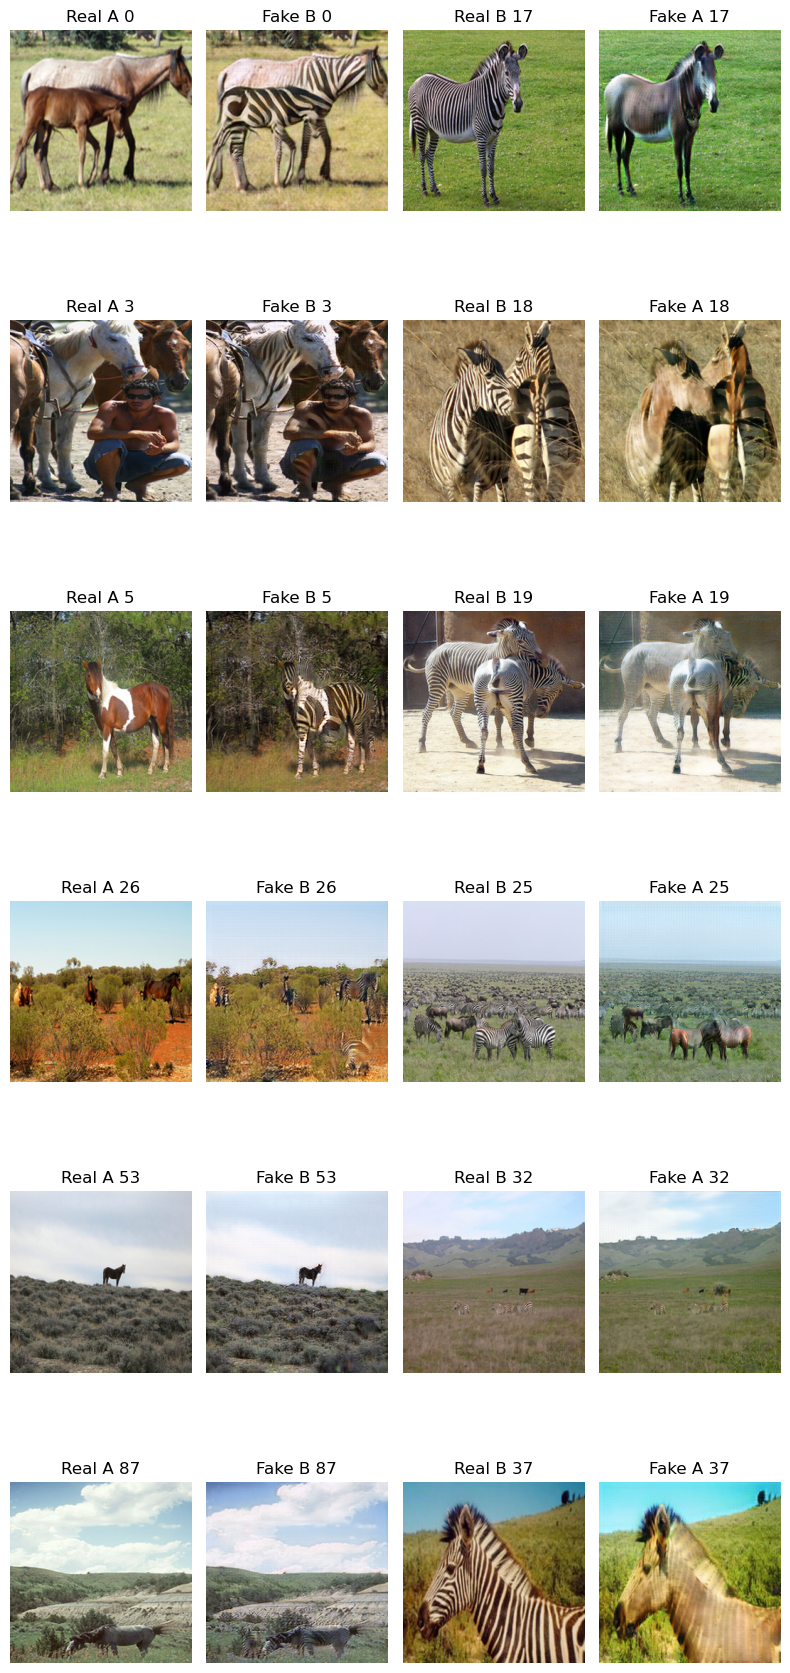

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import glob, os

def show_good_image_pairs(results_dir, b_to_a_indices, a_to_b_indices, max_pairs=10):
    # Get all real paths for a and b
    real_paths_a = sorted(glob.glob(os.path.join(results_dir, 'real_A_epoch_100_test_*.png')))
    real_paths_b = sorted(glob.glob(os.path.join(results_dir, 'real_B_epoch_100_test_*.png')))
    
    # Filtered based on good results indices
    good_real_paths_a_to_b = [real_paths_a[i] for i in a_to_b_indices]
    good_real_paths_b_to_a = [real_paths_b[i] for i in b_to_a_indices]

    # Plotting
    plt.figure(figsize=(8, 3 * max_pairs))
    for i, (real_path_a_to_b, real_path_b_to_a) in enumerate(zip(good_real_paths_a_to_b, good_real_paths_b_to_a)):
        if i >= max_pairs: break
        
        # Construct fake image paths (as per the matching pairs)
        fake_path_b_to_a = real_path_a_to_b.replace('real_A', 'fake_B')
        fake_path_a_to_b = real_path_b_to_a.replace('real_B', 'fake_A')

        # Ensure the fake paths exist
        if not os.path.exists(fake_path_b_to_a) or not os.path.exists(fake_path_a_to_b):
            continue

        # Open the images
        real_img_a_to_b = Image.open(real_path_a_to_b).convert('RGB')
        real_img_b_to_a = Image.open(real_path_b_to_a).convert('RGB')
        fake_img_b_to_a = Image.open(fake_path_b_to_a).convert('RGB')
        fake_img_a_to_b = Image.open(fake_path_a_to_b).convert('RGB')

        # Display real vs fake pairs
        plt.subplot(max_pairs, 4, 4*i + 1)
        plt.imshow(real_img_a_to_b)
        plt.title(f"Real A {a_to_b_indices[i]}")
        plt.axis('off')

        plt.subplot(max_pairs, 4, 4*i + 2)
        plt.imshow(fake_img_b_to_a)
        plt.title(f"Fake B {a_to_b_indices[i]}")
        plt.axis('off')

        plt.subplot(max_pairs, 4, 4*i + 3)
        plt.imshow(real_img_b_to_a)
        plt.title(f"Real B {b_to_a_indices[i]}")
        plt.axis('off')

        plt.subplot(max_pairs, 4, 4*i + 4)
        plt.imshow(fake_img_a_to_b)
        plt.title(f"Fake A {b_to_a_indices[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Indices of good results for b->a and a->b
    b_to_a_indices = [17, 18, 19, 25, 32, 37, 88, 97, 109, 128]
    a_to_b_indices = [0, 3, 5, 26, 53, 87, 106, 107, 113, 115, 124, 128, 136]

    show_good_image_pairs('results/', b_to_a_indices, a_to_b_indices, max_pairs=6)


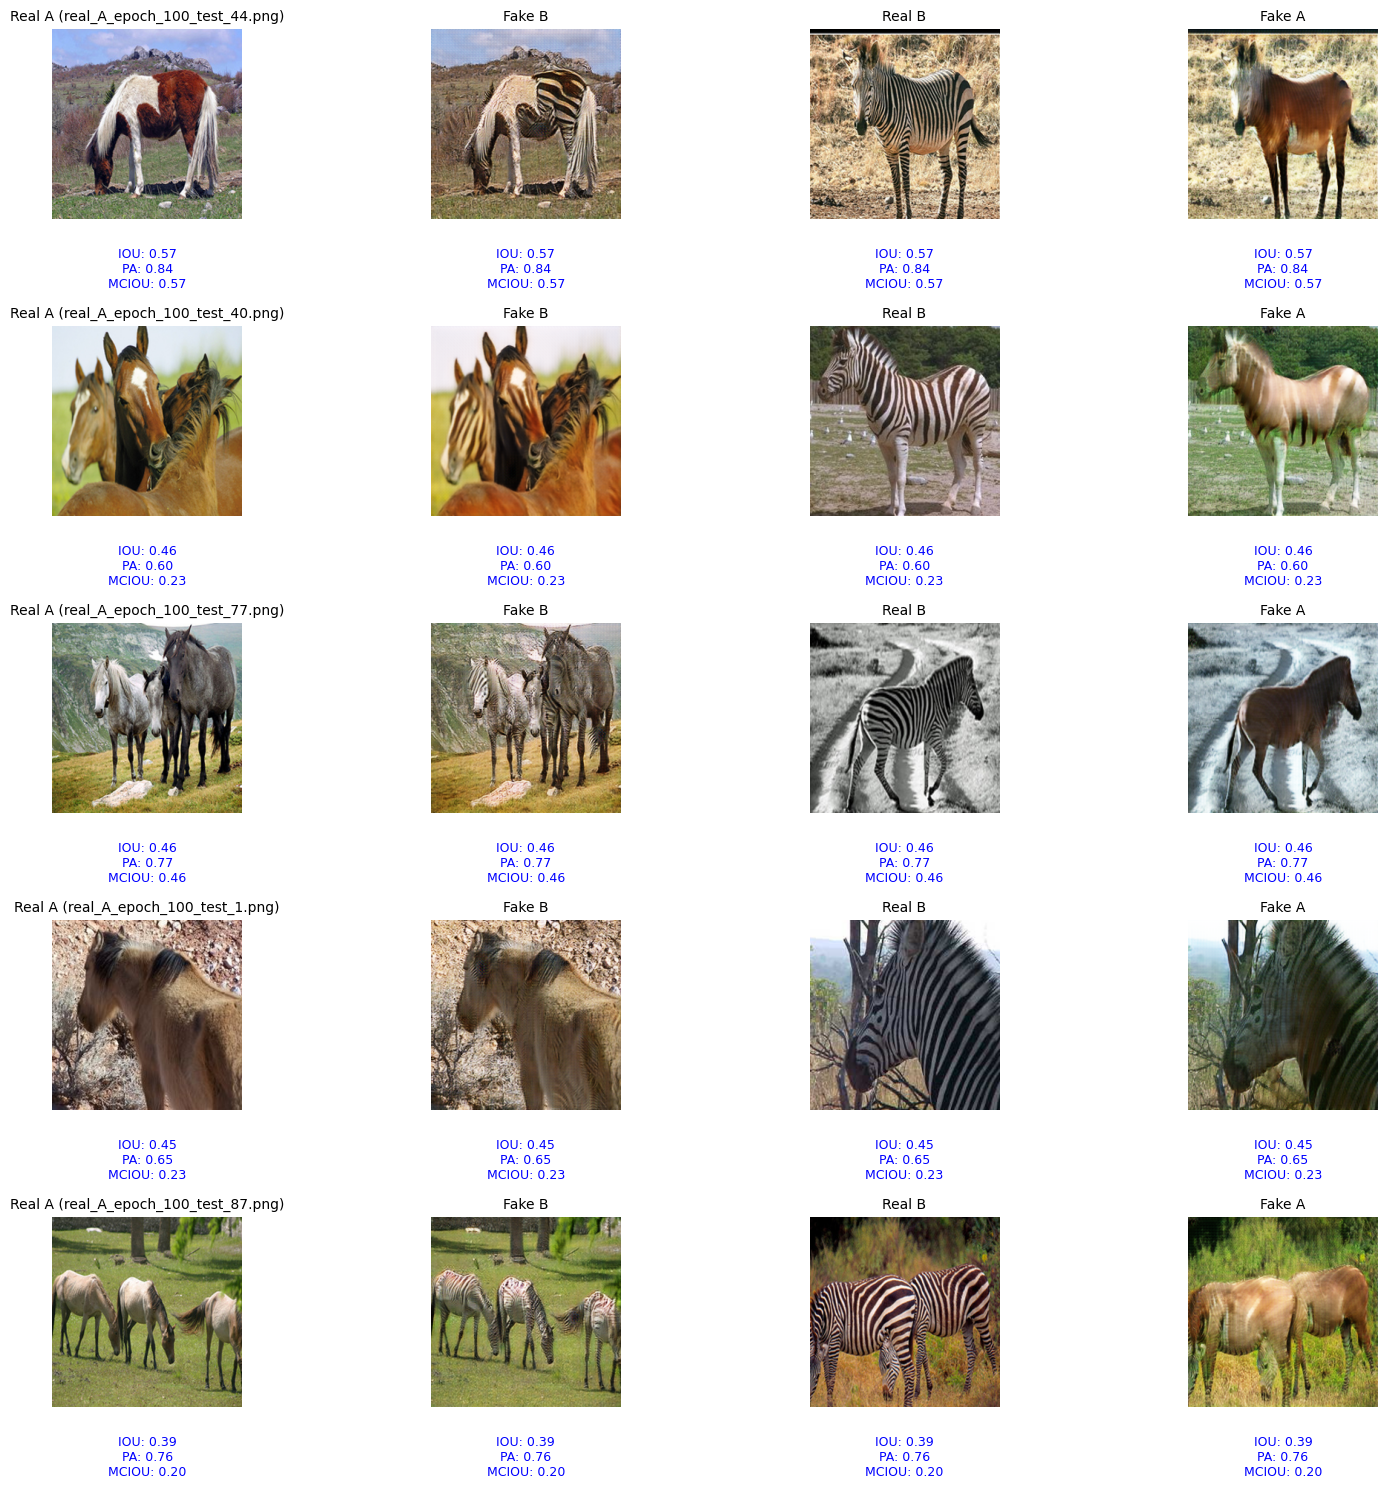

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import glob, os, csv
import numpy as np

def load_fcn_scores(csv_path):
    """Load FCN scores from the given CSV file."""
    fcn_scores = []
    with open(csv_path, newline='') as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        for row in reader:
            if row[0] != 'AVERAGE':  # Skip average row
                filename = row[0]
                iou = float(row[1])
                pixel_accuracy = float(row[2])
                mean_class_iou = float(row[3])
                fcn_scores.append((filename, iou, pixel_accuracy, mean_class_iou))
    return fcn_scores

def show_top_fcn_image_pairs(results_dir, fcn_scores, max_pairs=5):
    """
    Show the top image pairs based on FCN scores:
      - For each top pair (filename coming from domain A),
      - display Real A, Fake B, Real B, Fake A,
      - and below each image, show the score (IOU, Pixel Accuracy, Mean Class-wise IOU).
    """
    # Sort FCN scores by IOU
    sorted_fcn_scores = sorted(fcn_scores, key=lambda x: x[1], reverse=True)
    top_fcn_scores = sorted_fcn_scores[:max_pairs]

    # Set up a figure with 4 columns for each pair
    plt.figure(figsize=(16, 3 * max_pairs))
    
    for i, (filename, iou, pixel_accuracy, mean_class_iou) in enumerate(top_fcn_scores):
        # Construct file paths based on the given filename,
        # which is assumed to be from domain A (i.e. "real_A_epoch_100_test_XX.png")
        real_A_path = os.path.join(results_dir, filename)
        fake_B_path = os.path.join(results_dir, filename.replace('real_A', 'fake_B'))
        real_B_path = os.path.join(results_dir, filename.replace('real_A', 'real_B'))
        fake_A_path = os.path.join(results_dir, filename.replace('real_A', 'fake_A'))
        
        # Check that all required files exist:
        if not (os.path.exists(real_A_path) and os.path.exists(fake_B_path) and 
                os.path.exists(real_B_path) and os.path.exists(fake_A_path)):
            print(f"Missing one or more images for {filename}; skipping.")
            continue
        
        # Open images
        real_A_img = Image.open(real_A_path).convert('RGB')
        fake_B_img = Image.open(fake_B_path).convert('RGB')
        real_B_img = Image.open(real_B_path).convert('RGB')
        fake_A_img = Image.open(fake_A_path).convert('RGB')
        
        # Define a string with the scores to display under each image
        score_str = f"IOU: {iou:.2f}\nPA: {pixel_accuracy:.2f}\nMCIOU: {mean_class_iou:.2f}"
        
        # Plot Real A
        ax1 = plt.subplot(max_pairs, 4, 4*i + 1)
        ax1.imshow(real_A_img)
        ax1.set_title(f"Real A ({filename})", fontsize=10)
        ax1.axis('off')
        ax1.text(0.5, -0.15, score_str, transform=ax1.transAxes, 
                 ha='center', va='top', fontsize=9, color='blue')

        # Plot Fake B
        ax2 = plt.subplot(max_pairs, 4, 4*i + 2)
        ax2.imshow(fake_B_img)
        ax2.set_title(f"Fake B", fontsize=10)
        ax2.axis('off')
        ax2.text(0.5, -0.15, score_str, transform=ax2.transAxes, 
                 ha='center', va='top', fontsize=9, color='blue')

        # Plot Real B
        ax3 = plt.subplot(max_pairs, 4, 4*i + 3)
        ax3.imshow(real_B_img)
        ax3.set_title(f"Real B", fontsize=10)
        ax3.axis('off')
        ax3.text(0.5, -0.15, score_str, transform=ax3.transAxes, 
                 ha='center', va='top', fontsize=9, color='blue')
        
        # Plot Fake A
        ax4 = plt.subplot(max_pairs, 4, 4*i + 4)
        ax4.imshow(fake_A_img)
        ax4.set_title(f"Fake A", fontsize=10)
        ax4.axis('off')
        ax4.text(0.5, -0.15, score_str, transform=ax4.transAxes, 
                 ha='center', va='top', fontsize=9, color='blue')
        
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Path to the FCN score CSV file
    fcn_csv_path = 'score/fcn_scores.csv'
    # Load FCN scores from CSV
    fcn_scores = load_fcn_scores(fcn_csv_path)
    # Display the top 5 image pairs based on FCN scores
    show_top_fcn_image_pairs('results/', fcn_scores, max_pairs=5)
